In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv('customer_data.csv')

In [3]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Os dados representam o comportamento de 8.950 clientes de cartão de crédito nos últimos 6 meses, com 18 variáveis comportamentais.

Descriçãodas colunas:

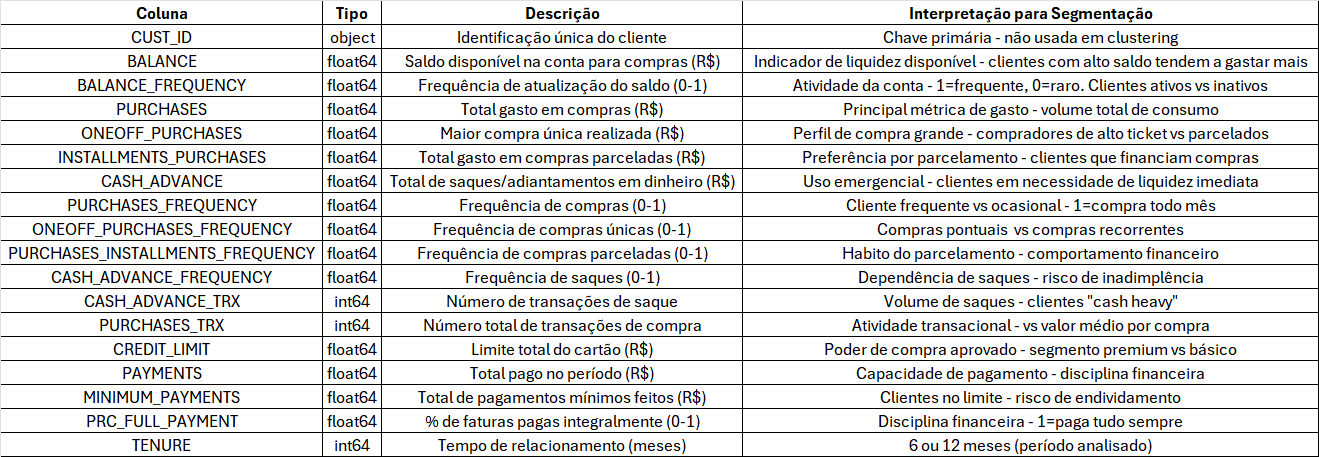

In [6]:
#As colunas "Credit_limit" e "Minimum_payments" possuem alguns dados nulos. Estes são corrijidos a seguir:
missing = df.isnull().sum().to_frame("qtd_missing")
missing["pct_missing"] = (missing["qtd_missing"] / len(df) * 100).round(2)
display(missing)

,qtd_missing,pct_missing
CUST_ID,0,0.00
BALANCE,0,0.00
BALANCE_FREQUENCY,0,0.00
PURCHASES,0,0.00
ONEOFF_PURCHASES,0,0.00
INSTALLMENTS_PURCHASES,0,0.00
CASH_ADVANCE,0,0.00
PURCHASES_FREQUENCY,0,0.00
ONEOFF_PURCHASES_FREQUENCY,0,0.00
PURCHASES_INSTALLMENTS_FREQUENCY,0,0.00


As colunas "credit_payments" e "minimum_payments" possuem dados nulos.

O tratamento destes dados será diferente para cada uma destas colunas. Em "CREDIT_LIMIT" A LINHA QUE POSSUI O DADO NULA SERÁ EXCLUÍDA, pois representa menos de 0,01% do dataset e sua falta não impactará negativamente os modelos.

A coluna "MINIMUM_PAYMENTS" possui 313 dados nulos, neste caso optou-se por substituílos pela mediana. Esta substituição leva em conta a distribuição dos dados desta coluna, existem milhonários (outliers) que elevam a média dos dados, desta forma, ao utilizar a mediana opta-se por replicar um padrão de comportamento da classe social majoritária.

In [7]:
df.dropna(subset=['CREDIT_LIMIT'], inplace=True)

mediana_min_payments = df['MINIMUM_PAYMENTS'].median()
df['MINIMUM_PAYMENTS'].fillna(mediana_min_payments, inplace=True)

print(df.isnull().sum())

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


O próximo passo fundamental é a Normalização (Padronização) dos dados, seguida pela Redução de Dimensionalidade (PCA).

Como os dados têm escalas muito diferentes (ex: BALANCE vai de 0 a 19.000, enquanto FREQUENCY vai de 0 a 1), o algoritmo de segmentação ficaria "viciado", dando muito mais peso para as variáveis de valores altos. A normalização resolve isso.

Também usaremos o PCA para conseguir gerar gráficos.

In [8]:
#Remover a coluna de identificação (não gera nenhum valor aos modelos)

df = df.drop('CUST_ID', axis=1)

In [9]:
scaler = StandardScaler()
df_scaled_array = scaler.fit_transform(df)

In [10]:
df_scaled = pd.DataFrame(df_scaled_array, columns=df.columns)
df_scaled.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.732054,-0.249881,-0.424934,-0.356957,-0.349114,-0.466805,-0.806649,-0.678716,-0.707409,-0.675294,-0.476083,-0.511381,-0.960380,-0.529026,-0.302427,-0.525588,0.360541
1,0.786858,0.134049,-0.469584,-0.356957,-0.454607,2.605438,-1.221928,-0.678716,-0.917090,0.573949,0.110032,-0.591841,0.688601,0.818546,0.097453,0.234159,0.360541
2,0.447041,0.517980,-0.107716,0.108843,-0.454607,-0.466805,1.269742,2.673295,-0.917090,-0.675294,-0.476083,-0.109082,0.826016,-0.383857,-0.093330,-0.525588,0.360541
3,0.049015,-1.017743,0.231995,0.546123,-0.454607,-0.368678,-1.014290,-0.399383,-0.917090,-0.258882,-0.329554,-0.551611,0.826016,-0.598733,-0.228291,-0.525588,0.360541
4,-0.358849,0.517980,-0.462095,-0.347317,-0.454607,-0.466805,-1.014290,-0.399383,-0.917090,-0.675294,-0.476083,-0.551611,-0.905414,-0.364421,-0.257295,-0.525588,0.360541


O **Silhouette Score** é uma métrica simples para avaliar quão boa é a divisão de dados em grupos (clusters) em algoritmos de clusterização, como o K-Means.

### Como Funciona
Para cada ponto de dados, a métrica compara duas coisas: o quão próximo ele está dos outros pontos do seu próprio grupo (chamado de coesão) e o quão distante ele está dos pontos dos grupos vizinhos (chamado de separação). Se o ponto se encaixa bem no seu grupo e fica longe dos outros, ele recebe uma pontuação alta.

### Interpretação
Os valores vão de -1 a 1. Próximo de 1 significa clusters bem formados e separados, com pouca sobreposição. Valores perto de zero indicam que os grupos se misturam, e negativos sugerem que pontos estão no grupo errado. O score médio de todos os pontos dá uma nota geral para a clusterização inteira.


Calculando modelos para diferentes valores de K...
------------------------------------------------------------
K     | Inércia (WCSS)       | Silhouette Score
------------------------------------------------------------
2     | 127773               | 0.2095
3     | 111962               | 0.2506
4     | 99054                | 0.1977
5     | 91787                | 0.1902
6     | 84820                | 0.2029
7     | 79492                | 0.2148
8     | 74456                | 0.2212
9     | 69806                | 0.2262
10    | 66434                | 0.2202


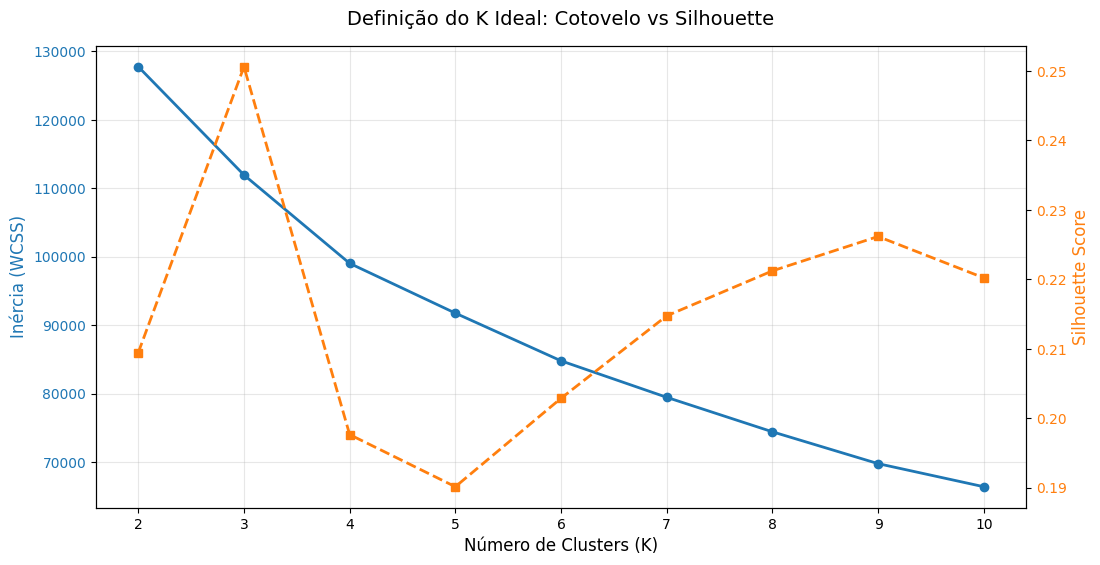

In [11]:
# Intervalo de K para testar (de 2 a 10 grupos)
K_range = range(2, 11)

inertia = []
silhouette_scores = []

print("Calculando modelos para diferentes valores de K...")
print("-" * 60)
print(f"{'K':<5} | {'Inércia (WCSS)':<20} | {'Silhouette Score'}")
print("-" * 60)

for k in K_range:
    # Treinar modelo K-Means
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)

    # Armazenar métricas
    inertia.append(kmeans.inertia_)
    score = silhouette_score(df_scaled, kmeans.labels_)
    silhouette_scores.append(score)

    print(f"{k:<5} | {kmeans.inertia_:<20.0f} | {score:.4f}")

# Visualização Gráfica (Dual Axis)
fig, ax1 = plt.subplots(figsize=(12, 6))

# Eixo 1: Inércia (Azul)
color = 'tab:blue'
ax1.set_xlabel('Número de Clusters (K)', fontsize=12)
ax1.set_ylabel('Inércia (WCSS)', color=color, fontsize=12)
ax1.plot(K_range, inertia, marker='o', color=color, linewidth=2, label='Inércia (Elbow)')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True, alpha=0.3)

# Eixo 2: Silhouette (Laranja)
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Silhouette Score', color=color, fontsize=12)
ax2.plot(K_range, silhouette_scores, marker='s', linestyle='--', color=color, linewidth=2, label='Silhouette')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Definição do K Ideal: Cotovelo vs Silhouette', fontsize=14, pad=15)
plt.show()

No eixo Y azul, “Inércia (WCSS)” representa o quão espalhados os pontos estão dentro dos clusters: é a soma das distâncias ao quadrado de cada ponto até o centróide do seu próprio cluster (Within-Cluster Sum of Squares). Valores menores indicam clusters mais compactos, por isso, ao aumentar K, a inércia tende a diminuir, mas depois de certo ponto o ganho passa a ser marginal (daí o “cotovelo”)

In [12]:
# Treinar modelo final com K=3 (melhor escolha)
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
labels = kmeans_final.fit_predict(df_scaled)

# Criar DataFrame final com clusters
df_final = df.copy()
df_final['CLUSTER'] = labels

In [13]:
df_final.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.452292,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


Informação preservada pelo PCA:
PCA1: 27.30%
PCA2: 20.31%
Total: 47.61%


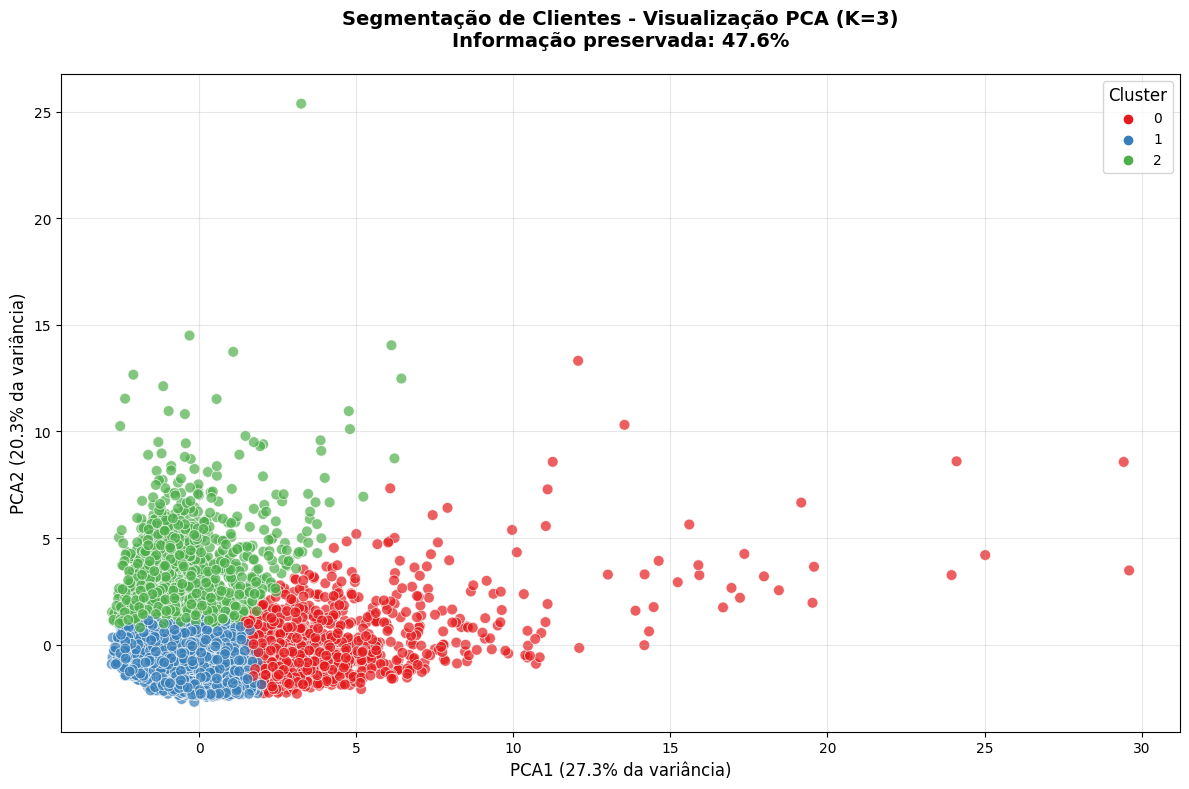

In [14]:
# 1. Aplicar PCA nos dados normalizados (df_scaled) para 2 componentes
pca = PCA(n_components=2, random_state=42)
pca_result = pca.fit_transform(df_scaled)

# 2. Criar DataFrame para visualização (PCA1, PCA2 + CLUSTER)
df_pca_viz = pd.DataFrame({
    'PCA1': pca_result[:, 0],
    'PCA2': pca_result[:, 1],
    'CLUSTER': df_final['CLUSTER']
})

print("Informação preservada pelo PCA:")
print(f"PCA1: {pca.explained_variance_ratio_[0]:.2%}")
print(f"PCA2: {pca.explained_variance_ratio_[1]:.2%}")
print(f"Total: {sum(pca.explained_variance_ratio_):.2%}")

# 3. GRÁFICO PRINCIPAL - Clusters no espaço 2D
plt.figure(figsize=(12, 8))

# Scatter plot colorido por cluster
sns.scatterplot(data=df_pca_viz, x='PCA1', y='PCA2', hue='CLUSTER',
                palette='Set1', s=60, alpha=0.7, legend='full')

plt.title('Segmentação de Clientes - Visualização PCA (K=3)\n'
          f'Informação preservada: {sum(pca.explained_variance_ratio_):.1%}',
          fontsize=14, fontweight='bold', pad=20)

plt.xlabel(f'PCA1 ({pca.explained_variance_ratio_[0]:.1%} da variância)', fontsize=12)
plt.ylabel(f'PCA2 ({pca.explained_variance_ratio_[1]:.1%} da variância)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(title='Cluster', title_fontsize=12, loc='upper right')
plt.tight_layout()
plt.show()

In [15]:
vars_importantes = [
    'BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
    'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS',
    'PURCHASES_FREQUENCY', 'PRC_FULL_PAYMENT'
]

cluster_profiles = df_final.groupby('CLUSTER')[vars_importantes].mean().round(2)
cluster_profiles.T

CLUSTER,0,1,2
BALANCE,2220.00,799.88,3989.14
PURCHASES,4268.52,505.62,384.53
ONEOFF_PURCHASES,2717.83,253.16,248.72
INSTALLMENTS_PURCHASES,1551.18,252.77,135.89
CASH_ADVANCE,458.42,330.84,3866.21
CREDIT_LIMIT,7733.97,3271.56,6675.44
PAYMENTS,4151.28,909.82,3019.11
PURCHASES_FREQUENCY,0.95,0.47,0.23
PRC_FULL_PAYMENT,0.30,0.16,0.03


Cluster	Perfil sugerido	Características chaves:

0	Clientes Premium / Alta movimentação	Alto saldo, alto gasto, alto limite, alta frequência, boa taxa de pagamento cheio.

1	Clientes Regulares / Baixa movimentação	Baixo saldo, gasto moderado/baixo, baixo limite, uso moderado do cartão.

2	Clientes de Risco / Cash Advance	Alto cash advance, limite alto, baixa frequência de compras, quase não paga fatura cheia.